In [207]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [208]:
df = pd.read_csv('housing.csv')

In [209]:
df.shape

(545, 13)

In [210]:
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [211]:
df.drop(columns= ['bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'], inplace = True)

In [212]:
df.isnull().sum()

price    0
area     0
dtype: int64

In [213]:
df['price'].max()

13300000

In [214]:
df['area'].max()

16200

In [215]:
# df['price'] = df['price']/13300000
# df['area'] = df['area']/16200
df['price'] = df['price'].astype(float)
df['area'].astype(float)
df['price']

0      13300000.0
1      12250000.0
2      12250000.0
3      12215000.0
4      11410000.0
          ...    
540     1820000.0
541     1767150.0
542     1750000.0
543     1750000.0
544     1750000.0
Name: price, Length: 545, dtype: float64

<Axes: xlabel='area', ylabel='price'>

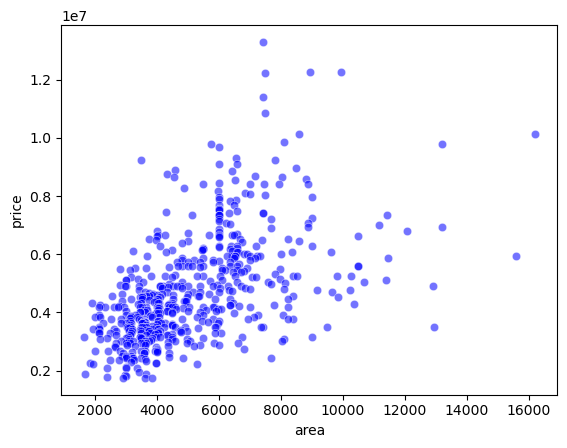

In [216]:
sns.scatterplot(data = df, x = 'area',y = 'price',c = 'b',alpha = 0.55)

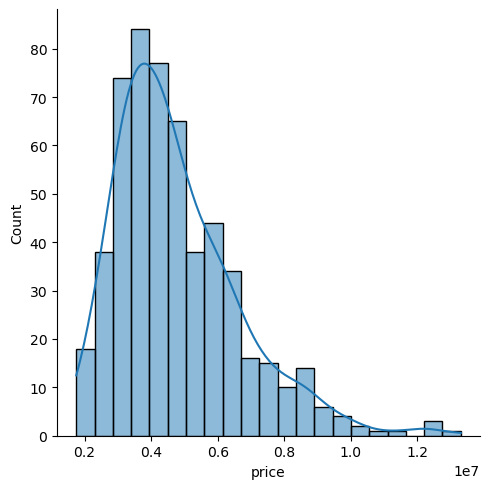

In [217]:
sns.displot(df['price'], kde = True)

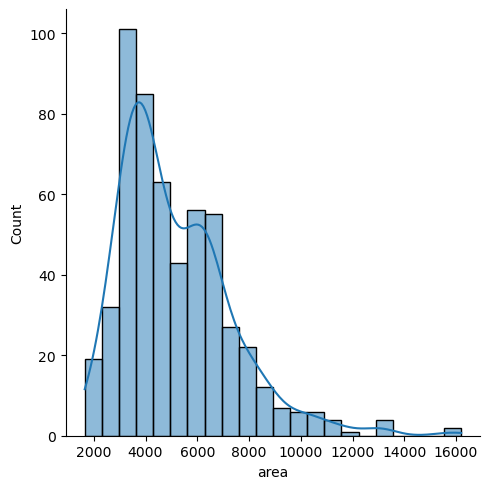

In [218]:
sns.displot(df['area'], kde = True)

<Axes: ylabel='price'>

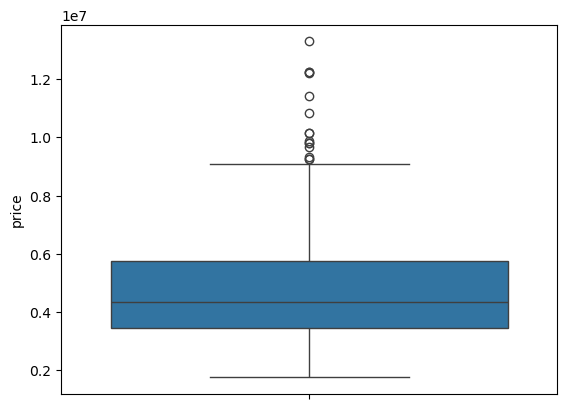

In [219]:
sns.boxplot(y='price', data=df)

<Axes: ylabel='area'>

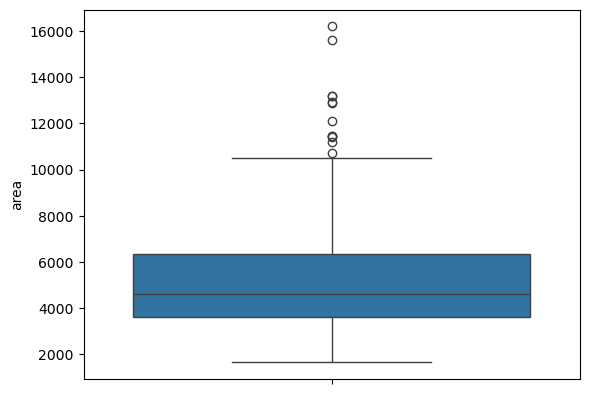

In [220]:
sns.boxplot(y='area', data=df)

In [221]:
df['price'].skew()

1.2122388370279802

In [222]:
df['area'].skew()

1.321188343153483

In [223]:
df.describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [224]:
#Finding IQR
price25 = df['price'].quantile(0.25)
price75 = df['price'].quantile(0.75)
area25 = df['area'].quantile(0.25)
area75 = df['area'].quantile(0.75)

In [225]:
print(price25, price75, area25, area75)

3430000.0 5740000.0 3600.0 6360.0


In [226]:
iqrprice = price75 - price25

In [227]:
iqrarea = area75 - area25

In [228]:
priceupper = price75 + 1.5 * iqrprice
pricelower = price25 - 1.5 * iqrprice

In [229]:
areaupper = area75 + 1.5 * iqrarea
arealower = area25 - 1.5 * iqrarea

In [230]:
dfnew = df.copy()
df['area'] = df['area'].apply(lambda x: min(max(x, arealower), areaupper))


df['price'] = df['price'].apply(lambda x: min(max(x, pricelower), priceupper))

print(df['price'].max(), df['area'].max())

9205000.0 10500.0


In [231]:
df['price'] = df['price']/9205000.0
df['area'] = df['area']/10500.0
x = np.array(df['area'])
y = np.array(df['price'])
m = len(x)
fx= np.zeros(m)
x = np.float64(x)
y = np.float64(y)

In [232]:
def compute_output(x,w,b):
    for i in range(m):
        fx[i] = w * x[i] + b
    return fx


In [233]:
df['price']

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
         ...   
540    0.197719
541    0.191977
542    0.190114
543    0.190114
544    0.190114
Name: price, Length: 545, dtype: float64

Text(0, 0.5, 'Price')

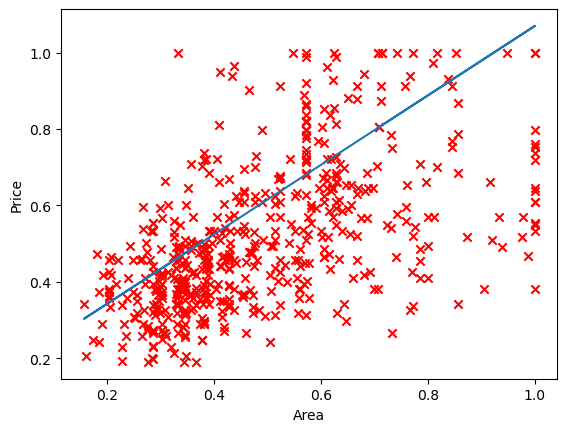

In [234]:
tmp_fx = compute_output(x, 0.91,0.16)
plt.plot(x, tmp_fx)
plt.scatter(x, y,marker='x', c='r',label='Actual Values')
plt.xlabel('Area')
plt.ylabel('Price')


In [235]:
def compute_cost(x,y,w,b):
    cost = 0
    for i in range(m):
        cost += (w * x[i] +b -y[i]) ** 2
    total_cost = cost / (2*m)
    return total_cost


In [236]:
cost = compute_cost(x,y,1,3)
cost

4.433594515238968

In [237]:
def compute_gradient(x,y,w,b):
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw += (w*x[i]+b-y[i])*x[i]
        dj_db += (w*x[i]+b-y[i])
    dj_dw /=m
    dj_db /=m
    return dj_dw, dj_db

In [238]:
import math
def gradient_descent(x,y,w,b, alpha, iterations, gradient_function):  
    J_history = []
    p_history = []
    for i in range(iterations):
        
        dj_dw , dj_db = gradient_function(x,y,w,b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i<100000:      # prevent resource exhaustion 
            J_history.append(compute_cost(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    
    return w,b, J_history, p_history

In [239]:
w,b, J_Hist, P_Hist = gradient_descent(x,y,0,0,0.01,20000,compute_gradient)


Iteration    0: Cost 1.46e-01  dj_dw: -2.696e-01, dj_db: -5.136e-01   w:  2.696e-03, b: 5.13567e-03
Iteration 2000: Cost 1.31e-02  dj_dw: -5.559e-03, dj_db:  2.783e-03   w:  3.600e-01, b: 3.41392e-01
Iteration 4000: Cost 1.26e-02  dj_dw: -3.094e-03, dj_db:  1.549e-03   w:  4.442e-01, b: 2.99284e-01
Iteration 6000: Cost 1.25e-02  dj_dw: -1.722e-03, dj_db:  8.618e-04   w:  4.910e-01, b: 2.75850e-01
Iteration 8000: Cost 1.25e-02  dj_dw: -9.581e-04, dj_db:  4.796e-04   w:  5.170e-01, b: 2.62808e-01
Iteration 10000: Cost 1.24e-02  dj_dw: -5.332e-04, dj_db:  2.669e-04   w:  5.315e-01, b: 2.55551e-01
Iteration 12000: Cost 1.24e-02  dj_dw: -2.967e-04, dj_db:  1.485e-04   w:  5.396e-01, b: 2.51511e-01
Iteration 14000: Cost 1.24e-02  dj_dw: -1.651e-04, dj_db:  8.267e-05   w:  5.441e-01, b: 2.49263e-01
Iteration 16000: Cost 1.24e-02  dj_dw: -9.191e-05, dj_db:  4.601e-05   w:  5.466e-01, b: 2.48012e-01
Iteration 18000: Cost 1.24e-02  dj_dw: -5.115e-05, dj_db:  2.560e-05   w:  5.480e-01, b: 2.47316

In [240]:
w

0.5487487809259485

In [241]:
b

0.24692896718154814

Text(0, 0.5, 'Price')

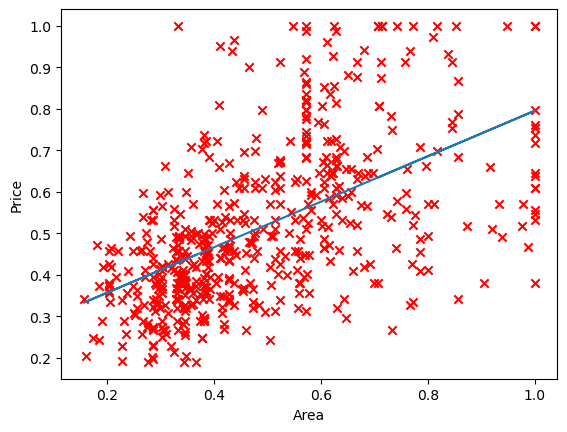

In [242]:
tmp_fx = compute_output(x, w,b)
plt.plot(x, tmp_fx)
plt.scatter(x, y,marker='x', c='r',label='Actual Values')
plt.xlabel('Area')
plt.ylabel('Price')

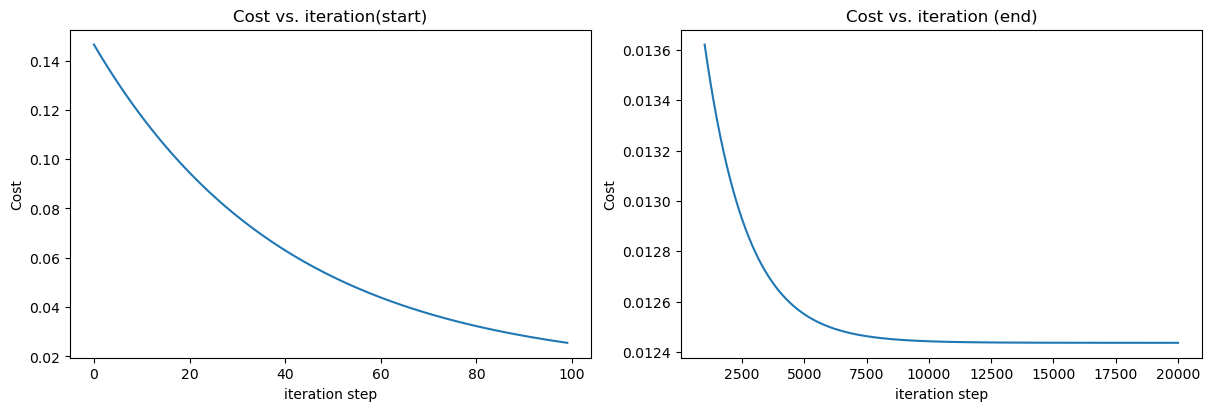

In [243]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_Hist[:100])
ax2.plot(1000 + np.arange(len(J_Hist[1000:])), J_Hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [244]:
dfnew = dfnew[dfnew['price']< priceupper]

In [245]:
dfnew['area'].max()

15600

In [246]:
dfnew['price'] = dfnew['price']/9100000.0
dfnew['area'] = dfnew['area']/15600.0
xn = np.array(dfnew['area'])
yn = np.array(dfnew['price'])
m = len(x)
fx= np.zeros(m)
xn = np.float64(x)
yn = np.float64(y)

In [247]:
cost = compute_cost(xn,yn,1,3)
cost

4.433594515238968

In [248]:
wn,bn, J_Hist, P_Hist = gradient_descent(xn,yn,0,0,0.01,20000,compute_gradient)

Iteration    0: Cost 1.46e-01  dj_dw: -2.696e-01, dj_db: -5.136e-01   w:  2.696e-03, b: 5.13567e-03
Iteration 2000: Cost 1.31e-02  dj_dw: -5.559e-03, dj_db:  2.783e-03   w:  3.600e-01, b: 3.41392e-01
Iteration 4000: Cost 1.26e-02  dj_dw: -3.094e-03, dj_db:  1.549e-03   w:  4.442e-01, b: 2.99284e-01
Iteration 6000: Cost 1.25e-02  dj_dw: -1.722e-03, dj_db:  8.618e-04   w:  4.910e-01, b: 2.75850e-01
Iteration 8000: Cost 1.25e-02  dj_dw: -9.581e-04, dj_db:  4.796e-04   w:  5.170e-01, b: 2.62808e-01
Iteration 10000: Cost 1.24e-02  dj_dw: -5.332e-04, dj_db:  2.669e-04   w:  5.315e-01, b: 2.55551e-01
Iteration 12000: Cost 1.24e-02  dj_dw: -2.967e-04, dj_db:  1.485e-04   w:  5.396e-01, b: 2.51511e-01
Iteration 14000: Cost 1.24e-02  dj_dw: -1.651e-04, dj_db:  8.267e-05   w:  5.441e-01, b: 2.49263e-01
Iteration 16000: Cost 1.24e-02  dj_dw: -9.191e-05, dj_db:  4.601e-05   w:  5.466e-01, b: 2.48012e-01
Iteration 18000: Cost 1.24e-02  dj_dw: -5.115e-05, dj_db:  2.560e-05   w:  5.480e-01, b: 2.47316

In [251]:
wn

0.5487487809259485

In [252]:
bn

0.24692896718154814

Text(0, 0.5, 'Price')

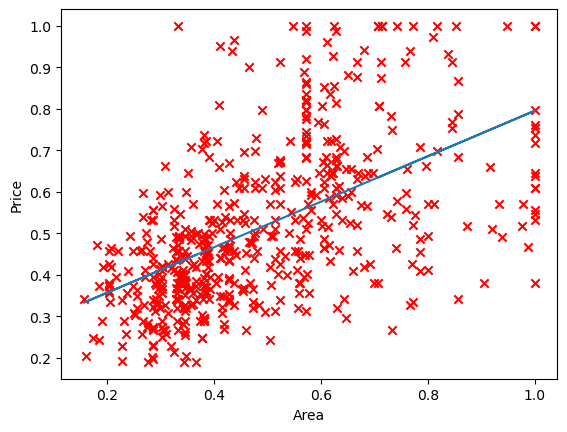

In [249]:
tmp_fx = compute_output(xn, wn,bn)
plt.plot(xn, tmp_fx)
plt.scatter(xn, yn,marker='x', c='r',label='Actual Values')
plt.xlabel('Area')
plt.ylabel('Price')

In [255]:
cost = compute_cost(xn, yn, wn, bn)
cost

0.012436582207494865

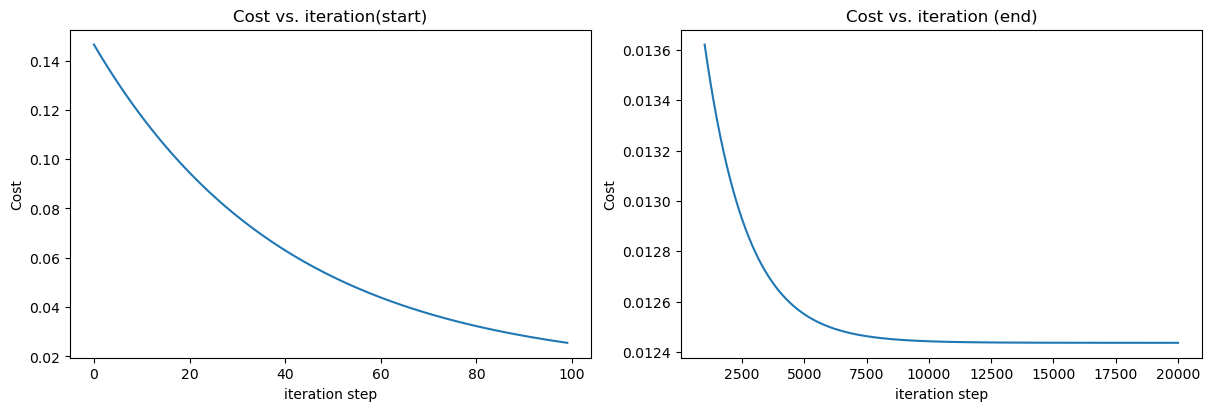

In [250]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_Hist[:100])
ax2.plot(1000 + np.arange(len(J_Hist[1000:])), J_Hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()